<a href="https://colab.research.google.com/github/AdarshSabarad/Sales-Analysis/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Analysis

Import Necessary Libraries

In [38]:
import pandas as pd
import os

Merging 12 months of sales data into a single CSV file

In [39]:
import glob

# list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_March_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_September_2019.csv',
 'Sales_February_2019.csv',
 'all_data.csv',
 'Sales_June_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_August_2019.csv',
 'Sales_April_2019.csv']

In [40]:
df_csv_concat = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
df_csv_concat
df_csv_concat.to_csv('all_data.csv', index=False)

In [41]:
all_data = pd.read_csv("/content/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#Clean up the data

Drop rows of NAN

In [42]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Find 'Or' and delete it

In [43]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

Convert columns to the correct type

In [44]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#Augment data with additional columns

Add month column

In [45]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Add a Sales column

In [46]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#What was the best month for sales? How much was earned that month?

In [62]:
numeric_cols = all_data.select_dtypes(include='number')
results = numeric_cols.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,21806,3623536.76,3644513.46,278970,564880
2,26898,4377769.44,4404044.84,345338,709770
3,34010,5582415.66,5614200.76,437938,895118
4,41116,6735342.04,6781340.48,524518,1088372
5,37334,6270250.26,6305213.50,477560,975798
6,30506,5124051.22,5155604.52,391056,804872
7,32144,5265079.12,5295551.52,412338,834698
8,26896,4460690.84,4488935.76,344578,707714
9,26218,4169984.18,4195120.26,337026,683396


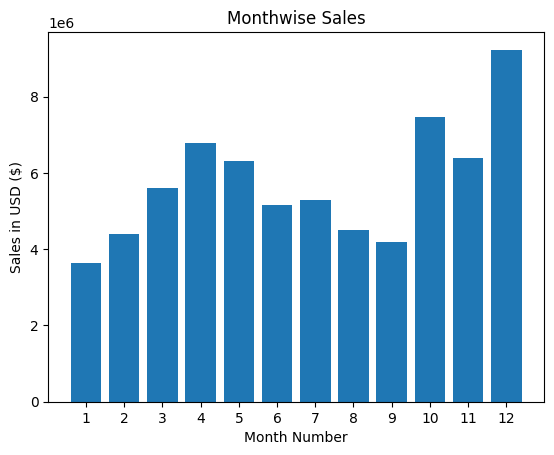

In [48]:

import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Number")
plt.title("Monthwise Sales")
plt.show()

#What city had the highest number of sales

In [49]:
all_data['city']=[x.split(',')[1] for x in all_data['Purchase Address'].values]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [66]:
numeric_cols = all_data.select_dtypes(include='number')
results_city = numeric_cols.groupby(all_data["city"]).sum()
results_city

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
city,,,,,,
Atlanta,33204,5559816.40,209588,5590997.16,428528,885864
Austin,22306,3619747.22,139658,3639163.50,283892,578120
Boston,45056,7274819.54,282224,7323284.02,576450,1180884
Dallas,33460,5505255.64,209240,5535950.80,428780,870310
Los Angeles,66578,10842870.46,416650,10905141.60,854888,1733276
New York City,55864,9270741.66,351482,9328634.86,715392,1467196
Portland,28106,4615494.94,175530,4640981.22,359264,736778
San Francisco,100478,16422923.48,631040,16524407.82,1286530,2638954
Seattle,33106,5466592.02,209882,5495510.96,426584,872736


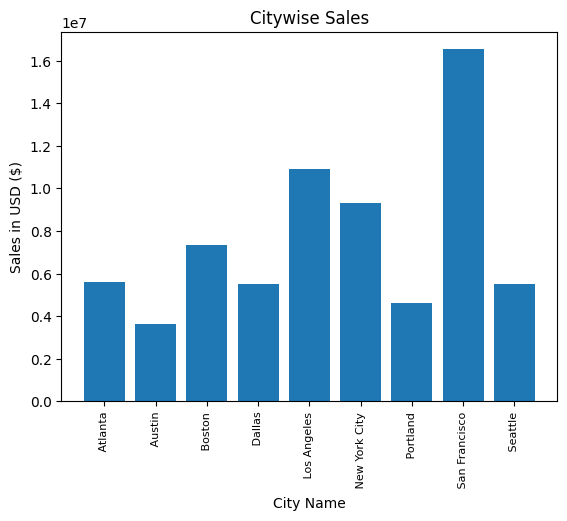

In [51]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby("city")]

plt.bar(cities, results_city["Sales"])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.title("Citywise Sales")
plt.show()

#What time should we display advertisements to maximize likelihood of customer's buying product?

In [52]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [53]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


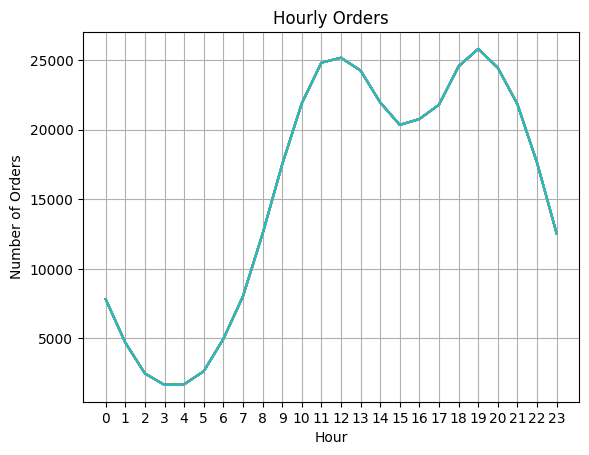

In [54]:
hours = [hour for hour, df in all_data.groupby("Hour")]

plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Hourly Orders")
plt.grid()
plt.show()


Answer: We can suggest to advertise the products right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

#What products are often sold together?

In [55]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop"
1,295666,"LG Washing Machine,LG Washing Machine"
2,295667,"USB-C Charging Cable,USB-C Charging Cable"
3,295668,"27in FHD Monitor,27in FHD Monitor"
4,295669,"USB-C Charging Cable,USB-C Charging Cable"


In [56]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


Answer: The most often products sold together are iPhone and Lightning Charging Cable with 1005 transactions.

#What product sold the most? Why do you think it sold the most?

In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


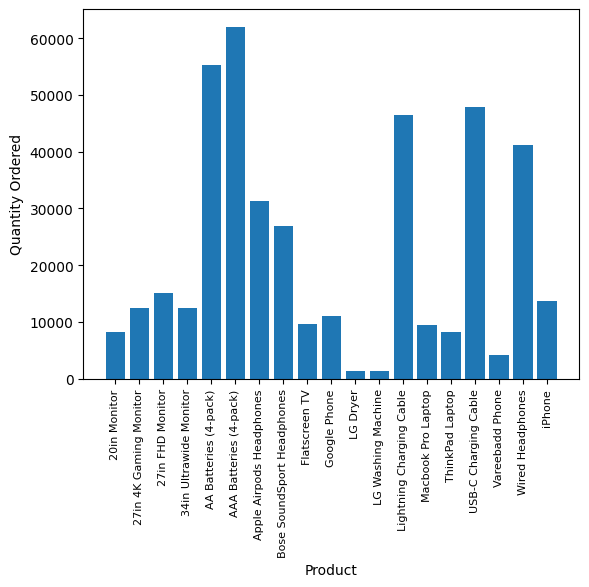

In [67]:
product_group = all_data.groupby("Product")

quantity_ordered = product_group.sum(numeric_only=True)["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation = "vertical", size = 8)
plt.show()


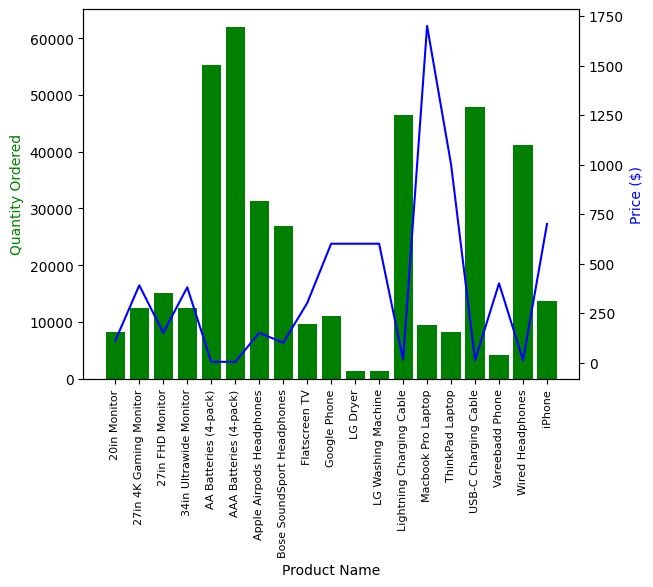

In [68]:
prices = all_data.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "g")
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation="vertical", fontsize=8)

plt.show()


Answer: AAA Batteries(4 pack) is the most sold product. Because it’s cheaper than other products and has high demand.